In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap

#sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils import resample
from sklearn.metrics import make_scorer, matthews_corrcoef
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.cluster import KMeans
from sklearn.model_selection import learning_curve

#import random
#import optuna


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import ClusterCentroids


print(sklearn.__version__)
import random
#import optuna

In [ ]:
#np.random.seed(12)

In [7]:
url = "https://github.com/kainath56/researchproject/raw/main/dataset_binarymixture_final.xlsx"
raw = pd.read_excel(url)
df = raw.copy()
df = df.dropna()
df = df.drop(columns=['Unnamed: 0', 'Solvent 1', 'Solvent 2', 'T'])
df2 =  df.copy()

print(df.head())

#converting each column into variables
q1 = df2.pop('q1')
q2 = df2.pop('q2')
r1 = df2.pop('r1')
r2 = df2.pop('r2')
x1 = df2.pop('x1')
x2 = df2.pop('x2')
ismisc = df2.pop('ismisc')


      q1     q2      r1      r2        x1        x2  ismisc
0  1.432  2.588  1.4311  2.5755  0.312852  0.132230       1
1  1.432  2.588  1.4311  2.5755  0.362349  0.564846       1
2  1.432  2.588  1.4311  2.5755  0.507916  0.181390       1
3  1.432  2.588  1.4311  2.5755  0.044826  0.656056       1
4  1.432  2.588  1.4311  2.5755  0.255614  0.554332       1


In [8]:
features = np.array((q1, q2,r1,r2, x1, x2)) #this gives a (dimension, samples) dataset
features=features.transpose() #this gives (samples,dimension)
print(features.shape)

label = np.array(ismisc) 
label=label.reshape(-1,1) 
print(label.shape)

(18432, 6)
(18432, 1)


In [9]:
scalar = StandardScaler()
scalar.fit(features);
x = scalar.transform(features)

y=label #no need to do scaling of y because it is a binary variable


In [10]:
Xtrain, Xtest, ytrain, ytest= train_test_split(x,y, test_size=0.3, shuffle=True, random_state=12, stratify=y) #turning shuffle on because currently the data is ordered by ismisc column
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

#Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=2765/15667, shuffle=True, random_state=12, stratify=ytrain)
#print(Xtrain.shape, Xtest.shape, Xval.shape,ytrain.shape, ytest.shape, yval.shape)



(12902, 6) (5530, 6) (12902, 1) (5530, 1)


## SVC model

In [11]:
def modeleval(ytestt, ypred):
  accuracy = accuracy_score(ytestt, ypred)
  mcc = matthews_corrcoef(ytestt, SVCypred.ravel())
  print("Prediction accuracy:", accuracy)
  print("Prediction mcc:", mcc)
  print("Classification report:\n", classification_report(ytestt,ypred))
  cfm = confusion_matrix(ytestt,ypred)
  disp = ConfusionMatrixDisplay(cfm)
  disp.plot()
  plt.gca().invert_yaxis()
  plt.show()

In [16]:
bin_c_2 = []
bin_sv_2=[]
bin_mcc_train_2=[]
bin_mcc_test_2=[]
for i in range(1,1000,10):
    print(i)
    params = {'C': i*0.01, 'degree': 8}
    SVCmodel = SVC(kernel='poly', C=params['C'], degree=params['degree'], random_state=12, class_weight='balanced', probability=True)
    SVCmodel.fit(Xtrain, ytrain.ravel())
    SVCytrain = SVCmodel.predict(Xtrain)
    SVCytest = SVCmodel.predict(Xtest)
    bin_mcc_train_2.append(matthews_corrcoef(ytrain.ravel(), SVCytrain))
    bin_mcc_test_2.append(matthews_corrcoef(ytest.ravel(), SVCytest))
    bin_c_2.append(i*0.01)
    bin_sv_2.append(len(SVCmodel.support_vectors_))
    
"""
bin_c_4 = []
bin_sv_4=[]
bin_mcc_train_4=[]
bin_mcc_test_4=[]
for i in range(1,100,10):
    print(i)
    params = {'C': i*0.01, 'degree': }
    SVCmodel = SVC(kernel='poly', C=params['C'], degree=params['degree'], random_state=12, class_weight='balanced', probability=True)
    SVCmodel.fit(Xtrain, ytrain.ravel())
    SVCytrain = SVCmodel.predict(Xtrain)
    SVCytest = SVCmodel.predict(Xtest)
    bin_mcc_train_4.append(matthews_corrcoef(ytrain.ravel(), SVCytrain))
    bin_mcc_test_4.append(matthews_corrcoef(ytest.ravel(), SVCytest))
    bin_c_4.append(i*0.01)
    bin_sv_4.append(len(SVCmodel.support_vectors_))
"""

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991


"\nbin_c_4 = []\nbin_sv_4=[]\nbin_mcc_train_4=[]\nbin_mcc_test_4=[]\nfor i in range(1,100,10):\n    print(i)\n    params = {'C': i*0.01, 'degree': }\n    SVCmodel = SVC(kernel='poly', C=params['C'], degree=params['degree'], random_state=12, class_weight='balanced', probability=True)\n    SVCmodel.fit(Xtrain, ytrain.ravel())\n    SVCytrain = SVCmodel.predict(Xtrain)\n    SVCytest = SVCmodel.predict(Xtest)\n    bin_mcc_train_4.append(matthews_corrcoef(ytrain.ravel(), SVCytrain))\n    bin_mcc_test_4.append(matthews_corrcoef(ytest.ravel(), SVCytest))\n    bin_c_4.append(i*0.01)\n    bin_sv_4.append(len(SVCmodel.support_vectors_))\n"

"\nimport csv\ndata = zip(bin_c_2,bin_sv_2,bin_mcc_train_2,bin_mcc_test_2,\n           bin_c_4,bin_sv_4,bin_mcc_train_4,bin_mcc_test_4)\nwith open('graphs_binary2.csv','w', newline='') as csvfile:\n    csvwriter=csv.writer(csvfile)\n    csvwriter.writerow(['c','sv','mcc1', 'mcc2', 'c','sv','mcc1', 'mcc2'])\n    csvwriter.writerows(data)\n"

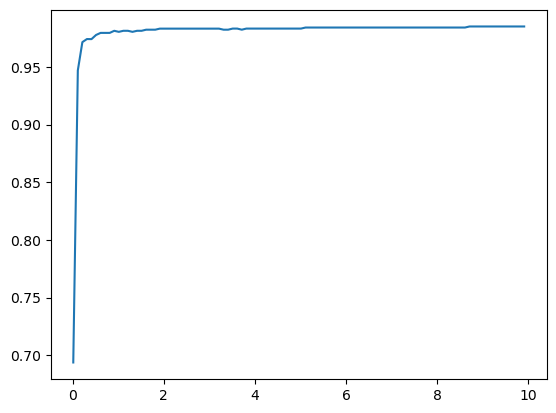

In [17]:
plt.plot(bin_c_2,bin_mcc_test_2)
    
"""
import csv
data = zip(bin_c_2,bin_sv_2,bin_mcc_train_2,bin_mcc_test_2,
           bin_c_4,bin_sv_4,bin_mcc_train_4,bin_mcc_test_4)
with open('graphs_binary2.csv','w', newline='') as csvfile:
    csvwriter=csv.writer(csvfile)
    csvwriter.writerow(['c','sv','mcc1', 'mcc2', 'c','sv','mcc1', 'mcc2'])
    csvwriter.writerows(data)
"""

In [98]:
params = {'C2': 15, 'deg2': 2, 'C4':5, 'deg4':4}

###################fitting the model##########################################
SVCmodel = SVC(kernel='rbf', C=params['C4'], degree=params['deg4'], random_state=12, class_weight='balanced', probability=True)
SVCmodel.fit(Xtrain, ytrain.ravel())
SVCytrain = SVCmodel.predict(Xtrain)
SVCytest = SVCmodel.predict(Xtest)
SVCy=SVCmodel.predict(x)
#SVCyval = SVCmodel.predict(Xval)
print(matthews_corrcoef(ytrain.ravel(), SVCytrain))
print(matthews_corrcoef(ytest.ravel(), SVCytest))

print(len(SVCmodel.support_vectors_))




0.9596442283185366
0.9700270547560427
339


#stratified kfold
scorer = make_scorer(matthews_corrcoef)
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=12)
accuracy = []
for train_index, test_index in skf.split(Xtest,ytest.ravel()):
    x1_train, x1_test = Xtest[train_index], Xtest[test_index]
    y1_train, y1_test = ytest[train_index], ytest[test_index]
    SVCmodel2 = SVC(kernel='poly', C=params['C'], degree=params['degree'], random_state=12, class_weight='balanced', probability=True)
    SVCmodel2.fit(x1_train,y1_train.ravel())
    prediction = SVCmodel2.predict(x1_test)
    score = matthews_corrcoef(prediction, y1_test.ravel())
    print("Score", score)
    accuracy.append(score)

print("Average score,", sum(accuracy)/len(accuracy))
print("Max score", max(accuracy))

# transfer to gams

In [84]:
%reload_ext gams_magic
%gams_cleanup

In [85]:
%%capture
%run DataTransform.ipynb

In [86]:
x_sv = SVCmodel.support_vectors_
y_sv = SVCmodel.predict(x_sv)*2-1  #map the y to -1,1
v_sv = SVCmodel.dual_coef_.ravel()
bias= float(SVCmodel.intercept_)
print(x_sv.shape)


df3 = df.copy()
df3 = df3.drop(columns=['ismisc'])
a=df3.describe()
mean= a.loc['mean']
std=(a.loc['std'])
print(mean)
print(std)

input_offset = np.array(mean)
input_gain = np.array(1/std)

print("mean aka offset:", input_offset)
print("gain aka 1/std :", input_gain )

d = params['deg4']
print(d)


(264, 6)
q1    2.581667
q2    2.601889
r1    2.786711
r2    2.905844
x1    0.333361
x2    0.333258
Name: mean, dtype: float64
q1    0.767713
q2    0.783279
r1    0.948082
r2    1.208076
x1    0.180004
x2    0.179409
Name: std, dtype: float64
mean aka offset: [2.58166667 2.60188889 2.78671111 2.90584444 0.33336146 0.33325809]
gain aka 1/std : [1.30257016 1.27668481 1.05476087 0.82776256 5.55544541 5.57387066]
4


#checking prediction of my decision function against python's prediction 

#SVCmodel = SVC(kernel='poly', C=params['C'], degree=params['degree'], random_state=12, class_weight='balanced', probability=False)
#SVCmodel.fit(Xtrain, ytrain.ravel())


v_sv = SVCmodel.dual_coef_.flatten()
x_sv = SVCmodel.support_vectors_
bias = SVCmodel.intercept_[0]

#Checking custom decision function against scikit-learn's predictions
pred = []
for i in range(len(Xtest)):
    xt = Xtest[i, :].reshape(1, -1)
    yt = SVCmodel.predict(xt) * 2 - 1

    # Predicting using weights and kernel function
    kernel = (x_sv.dot(xt.T)+1) ** 2
    prediction = np.sign(np.sum(v_sv * kernel) + bias)

    # Prediction of weights == prediction by scikit-learn?
    pred.append((prediction == yt).tolist())

pred = np.ravel(pred).tolist()
a = pred.count(True)
b = pred.count(False)
print(a / (a + b))

In [87]:
%gams SETS f  /1*6/;
%gams SETS sv      'support vectors samples' /1*264/;
%gams_pull f sv

In [88]:
%%gams

TABLE x_sv(sv,f);

Parameters
v_sv(sv)
input_offset(f)
input_gain(f)

;
SCALAR
bias
d
;

In [89]:
%gams_push x_sv
%gams display x_sv;
%gams_lst -e
%gams_cleanup -k


%gams_push v_sv
%gams display v_sv;
%gams_lst -e
%gams_cleanup -k

%gams_push input_offset
%gams display input_offset;
%gams_lst -e
%gams_cleanup -k

%gams_push input_gain
%gams display input_gain;
%gams_lst -e
%gams_cleanup -k


%gams_push bias
%gams display bias;
%gams_lst -e
%gams_cleanup -k

%gams_push d
%gams display d;
%gams_lst -e
%gams_cleanup -k

E x e c u t i o n


----     28 PARAMETER x_sv  2-dim Matrix

              1           2           3           4           5           6

1         0.706      -1.534       0.488      -1.644      -0.661       2.296
2        -0.224      -1.534       0.088      -1.644       2.874      -1.704
3         0.696      -1.534       0.730      -1.644       0.544      -1.341
4        -0.224      -1.534       0.088      -1.644      -1.504       2.881
5         0.696      -1.534       0.730      -1.644       1.449      -1.157
6         0.706      -1.534       0.488      -1.644      -1.240       0.388
7         1.785      -1.534       1.908      -1.644       0.235      -1.318
8        -0.224      -1.534       0.088      -1.644       0.502       0.600
9         0.706      -1.534       0.488      -1.644      -1.024       0.956
10        0.696      -1.534       0.730      -1.644       1.350      -1.120
11        1.785      -1.534       1.908      -1.644       0.722      -1.181
12        0.706      -1.5

E x e c u t i o n


----     34 PARAMETER v_sv  1-dim Matrix

1    -3.390,    2   -12.683,    3   -23.339,    4   -10.827,    5   -23.339,    6   -23.339,    7   -23.339,    8   -11.608,    9   -23.339,    10   -1.138,    11  -13.102,    12  -23.339,    13   -1.347,    14  -23.339,    15  -23.339,    16   -0.265,    17  -23.339,    18  -23.339,    19  -14.132,    20  -23.339,    21  -23.339,    22  -23.339,    23   -7.533,    24   -3.562,    25  -15.532,    26  -13.168,    27   -0.503,    28   -0.788,    29  -13.753,    30  -23.339,    31  -23.339,    32   -0.216,    33  -23.339,    34   -4.485,    35  -23.339,    36   -8.254,    37  -22.872,    38   -3.651,    39  -23.339,    40  -23.339,    41    2.800,    42    2.800,    43    2.800,    44    2.800,    45    2.800,    46    2.800,    47    2.800,    48    2.800,    49    2.800,    50    2.800,    51    2.800,    52    2.800,    53    2.800,    54    2.800,    55    2.800,    56    2.800,    57    2.800,    58    2.800,    59    2.80